In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True,precision=6 )

In [14]:
train=pd.read_csv(r"../input/janatahack-healthcare-analytics-part-2/train.csv",na_values=np.isnan)
test =pd.read_csv(r"../input/janatahack-healthcare-analytics-part-2/test.csv",na_values=np.isnan)

In [15]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [16]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [17]:
for data in [train,test]:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [18]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,train_or_test
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


#### Missing Values Pattern

<AxesSubplot:>

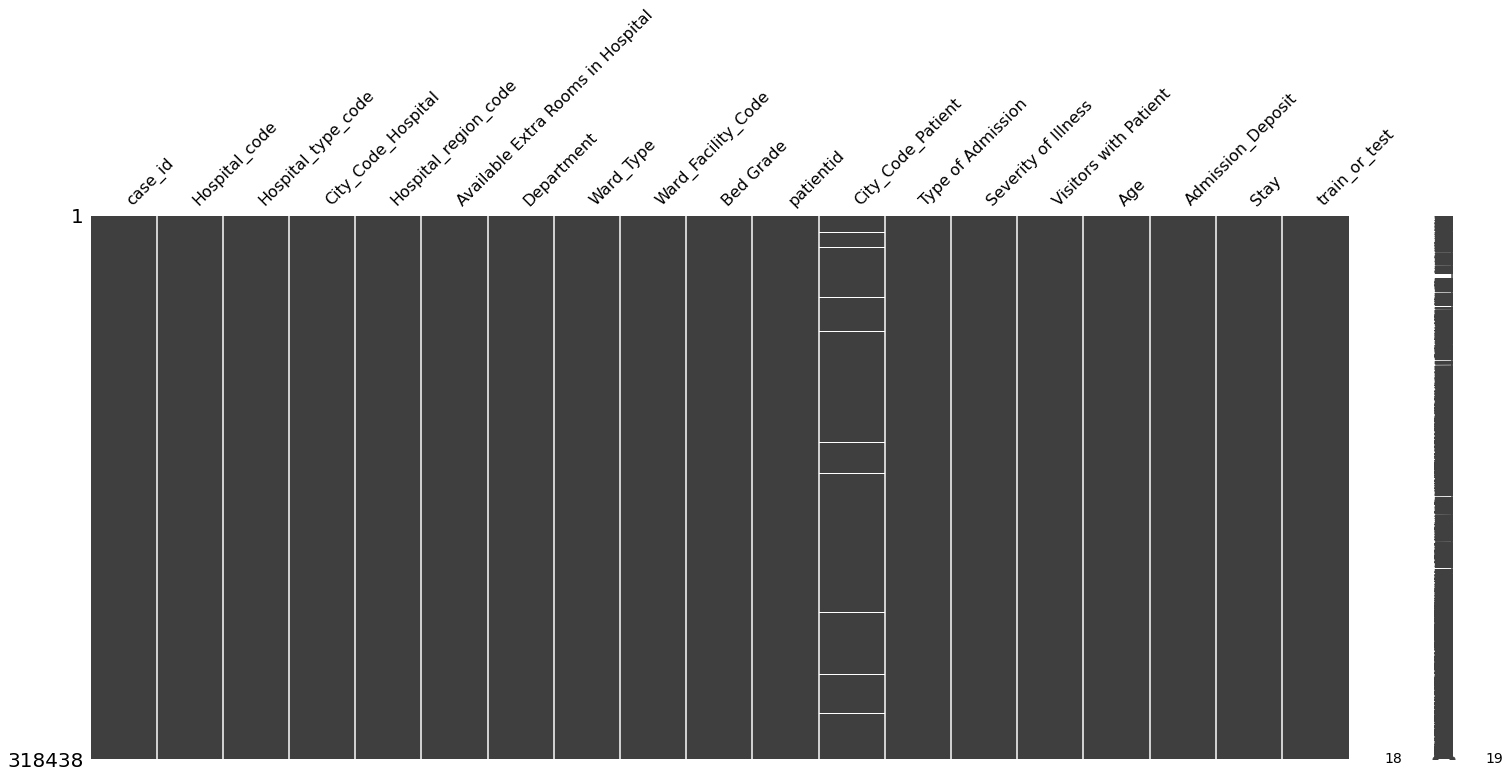

In [19]:
msno.matrix(train)

#### Feature Engineering 

In [20]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(train[col].value_counts())

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64
R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64
21-30                 87491
11-2

In [21]:
map_hospital_type_code={'a': 0,'b': 1,'c': 2,'e': 3,'d': 4,'f': 5,'g': 6} 
df['Hospital_type_code'] = df['Hospital_type_code'].map(map_hospital_type_code)

map_hospital_region_code = {'X': 0, 'Y': 1, 'Z': 2}
df['Hospital_region_code'] = df['Hospital_region_code'].map(map_hospital_region_code)

map_department={'gynecology': 0,'anesthesia': 1,'radiotherapy': 2,'TB & Chest disease': 3,'surgery': 4}
df['Department'] = df['Department'].map(map_department)

map_ward_type ={'R': 0, 'Q': 1, 'S': 2, 'P': 3, 'T': 4, 'U': 5}
df['Ward_Type'] = df['Ward_Type'].map(map_ward_type)

map_ward_fac ={'F':0, 'E': 1, 'D':2, 'C': 3, 'B': 4, 'A': 5}
df['Ward_Facility_Code'] = df['Ward_Facility_Code'].map(map_ward_fac)

map_admiss = {'Trauma': 0, 'Emergency': 1, 'Urgent': 2}
df['Type of Admission'] = df['Type of Admission'].map(map_admiss)

map_severity = {'Minor': 1,'Moderate': 2,'Extreme': 3}
df['Severity of Illness'] = df['Severity of Illness'].map(map_severity)

map_age = {'0-10': 5,'11-20': 15,'21-30': 25,'31-40': 35,'41-50': 45,
           '51-60': 55,'61-70': 65,'71-80': 75,'81-90': 85,'91-100': 95}
df['Age'] = df['Age'].map(map_age)

# map_stay = {'0-10': 0,'11-20': 1,'21-30': 2,
#              '31-40': 3,'41-50': 4, '51-60': 5,'61-70': 6,
#              '71-80': 7,'81-90': 8,'91-100': 9, 
#              'More than 100 Days': 10,}
# df['Stay'][df['train_or_test']=='train'] = df['Stay'][df['train_or_test']=='train'].map(map_stay).astype(int)

In [22]:
df['Bed Grade'].fillna(df['Bed Grade'][df['train_or_test']=='train'].mode()[0],inplace=True)
df['City_Code_Patient'].fillna(df['City_Code_Patient'][df['train_or_test']=='train'].mode()[0],inplace=True)

In [23]:
df['case'] = np.zeros((len(df))) 
df['case'][(df['Type of Admission']==0) & (df['Severity of Illness']==1)] = 1
df['case'][(df['Type of Admission']==0) & (df['Severity of Illness']==2)] = 2
df['case'][(df['Type of Admission']==0) & (df['Severity of Illness']==3)] = 3
df['case'][(df['Type of Admission']==1) & (df['Severity of Illness']==1)] = 1
df['case'][(df['Type of Admission']==1) & (df['Severity of Illness']==2)] = 2
df['case'][(df['Type of Admission']==1) & (df['Severity of Illness']==3)] = 3
df['case'][(df['Type of Admission']==2) & (df['Severity of Illness']==1)] = 2
df['case'][(df['Type of Admission']==2) & (df['Severity of Illness']==2)] = 3
df['case'][(df['Type of Admission']==2) & (df['Severity of Illness']==3)] = 2

In [24]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test','Stay'},axis=1,inplace=True)
test.drop(columns={'train_or_test','Stay'},axis=1,inplace=True)

In [25]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,case
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0,3.0
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0,3.0
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0,3.0
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,3,2,55,7272.0,3.0
4,5,26,1,2,1,2,2,2,2,2.0,31397,7.0,0,3,2,55,5558.0,3.0


In [26]:
from sklearn.model_selection import train_test_split as tts

x=train.drop(columns={'case_id','Bed Grade'},axis=1)
y=train['Bed Grade'].astype(int)

test_input = test.drop(columns={'case_id','Bed Grade'},axis=1)
test_output = test['Bed Grade'].astype(int)

x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2)   

### RFC

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400,max_depth=11,n_jobs=-1).fit(x_train,y_train)

In [28]:
pred=rfc.predict(x_test)

from sklearn.metrics import accuracy_score 
accuracy_score(y_test,pred)

0.5031089059163422

In [37]:
pred_test=rfc.predict(test_input)

from sklearn.metrics import accuracy_score 
accuracy_score(test_output,pred_test)

0.5005362732293863

### Catboost

In [44]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
accuracies = [] 
y_pred = []


fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
i = 0

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = CatBoostClassifier(n_estimators=1000,
                       random_state=2020,
                       eval_metric='Accuracy',
                       learning_rate=0.08,
                       depth=8,task_type='GPU'
                       )
    m.fit(x_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=100,verbose=200)
    pred_y = m.predict(x_val)
    print("Fold-",i, " accuracy : ", accuracy_score(y_val,pred_y))
    accuracies.append(accuracy_score(y_val,pred_y))
    y_pred.append( m.predict(test_input))
    i = i + 1
# y_pred_prob=y_pred_prob/10

0:	learn: 0.4883529	test: 0.4894172	best: 0.4894172 (0)	total: 19.2ms	remaining: 19.2s
200:	learn: 0.5163821	test: 0.5077880	best: 0.5080078 (167)	total: 3.36s	remaining: 13.4s
bestTest = 0.5090126868
bestIteration = 250
Shrink model to first 251 iterations.
Fold- 0  accuracy :  0.5090126868483859
0:	learn: 0.4909977	test: 0.4902336	best: 0.4902336 (0)	total: 36.1ms	remaining: 36s
200:	learn: 0.5167100	test: 0.5070657	best: 0.5074111 (197)	total: 3.62s	remaining: 14.4s
bestTest = 0.5082590127
bestIteration = 291
Shrink model to first 292 iterations.
Fold- 1  accuracy :  0.5082590126868484
0:	learn: 0.4882866	test: 0.4900138	best: 0.4900138 (0)	total: 18.7ms	remaining: 18.7s
200:	learn: 0.5168147	test: 0.5077566	best: 0.5081020 (173)	total: 3.44s	remaining: 13.7s
400:	learn: 0.5283781	test: 0.5092011	best: 0.5096407 (382)	total: 6.82s	remaining: 10.2s
bestTest = 0.5096407486
bestIteration = 382
Shrink model to first 383 iterations.
Fold- 2  accuracy :  0.5096407486496671
0:	learn: 0.490

In [45]:
#avg accuracies
sum(accuracies)/10

0.5093330566505749

In [48]:
y_pred = np.reshape(np.array(y_pred),(10,137057))

In [51]:
from scipy import stats
m = stats.mode(y_pred)
test_pred = m[0]

In [56]:
test_pred

array([2, 2, 2, ..., 3, 3, 3])

In [57]:
# pred_test = [np.argmax(x) for x in y_pred_prob]
accuracy_score(test_output,test_pred.ravel())

0.5075333620318554